In [10]:
import h5py
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

In [11]:
path = "/Users/daweixu/vcontact3_test/output_directory/HMMprofile_mLayer_shared_ntw.h5"

with h5py.File(path, "r") as f:
    data = f["data"][:]
    indices = f["indices"][:]
    indptr = f["indptr"][:]
    shape = f["shape"][:]
    
    # Reconstruct the sparse matrix
    shared_matrix = csr_matrix((data, indices, indptr), shape=shape)

print("Matrix shape:", shared_matrix.shape)
print("Number of nonzero edges:", shared_matrix.nnz)

Matrix shape: (26935, 26935)
Number of nonzero edges: 6328317


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add edges with weights above a threshold (to avoid clutter)
threshold = 0.1  # adjust depending on how dense your network is
for i, g1 in enumerate(df_shared.index):
    for j, g2 in enumerate(df_shared.columns):
        if j > i and df_shared.iloc[i, j] > threshold:
            G.add_edge(g1, g2, weight=df_shared.iloc[i, j])

# Draw the network
plt.figure(figsize=(8,6))
nx.draw(G, node_size=100, node_color="skyblue", edge_color="gray", with_labels=False)
plt.title("vConTACT3 Gene-Sharing Network (from HMMprofile_mLayer_shared_ntw.h5)")
plt.show()

In [12]:
dense_matrix = shared_matrix.toarray()
df_shared = pd.DataFrame(dense_matrix)
df_shared.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0     13      0      0      0      0      0      0      0      0      0  ...   
1      0    242      0      0      0      0      0      0      0      0  ...   
2      0      0      6      0      0      0      0      0      0      0  ...   
3      0      0      0    209      0      0      0      0      0      0  ...   
4      0      0      0      0     17      0      0      0      0      0  ...   

   26925  26926  26927  26928  26929  26930  26931  26932  26933  26934  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 26935 columns]

Subgraph: 1025 nodes, 3313 edges


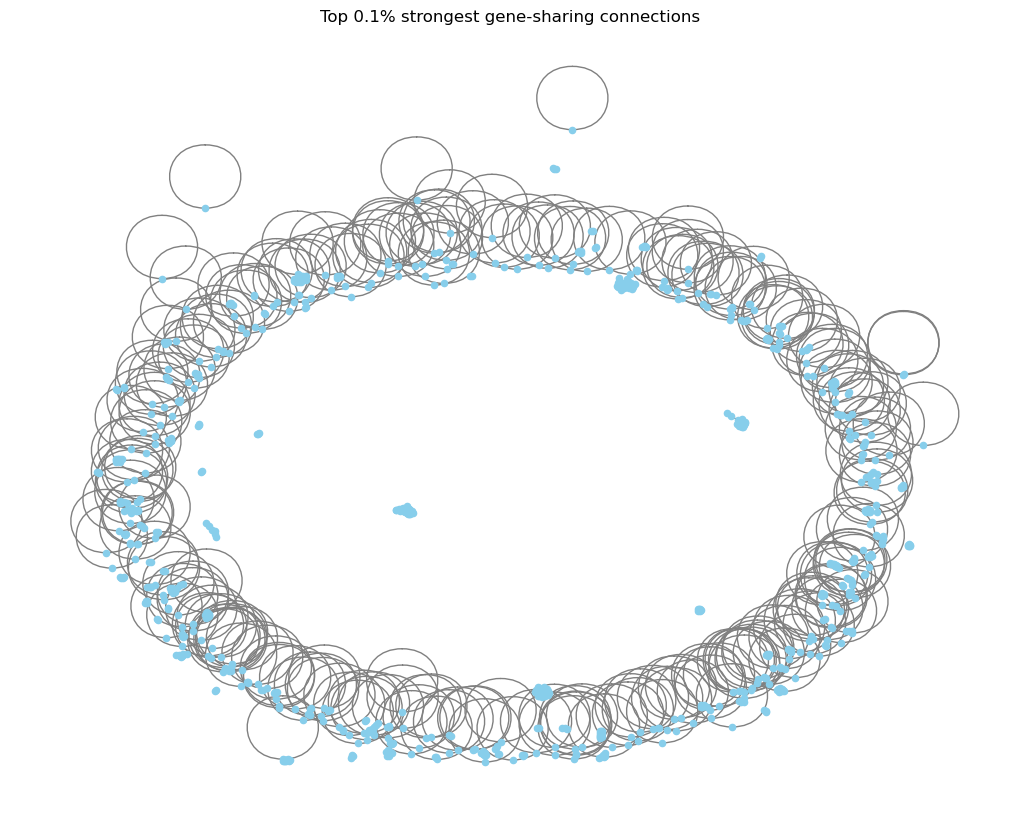

In [14]:
# Convert to graph directly from sparse matrix
G = nx.from_scipy_sparse_array(shared_matrix)

# Get edge weights
weights = nx.get_edge_attributes(G, 'weight')
threshold = np.percentile(list(weights.values()), 99.9)  # top 0.1%

# Subgraph of strongest edges
H = G.edge_subgraph([(u, v) for u, v, w in G.edges(data='weight') if w >= threshold])

print(f"Subgraph: {H.number_of_nodes()} nodes, {H.number_of_edges()} edges")

# Plot sampled subgraph
plt.figure(figsize=(10,8))
nx.draw(H, node_size=20, edge_color="gray", node_color="skyblue", with_labels=False)
plt.title("Top 0.1% strongest gene-sharing connections")
plt.show()
